In [20]:
# Importing necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt  # For creating static plots
import plotly.express as px   # For creating interactive plots

# Loading the Netflix data
df = pd.read_csv("netflix_titles.csv")

### Line plot - Analyzing Trends in Movie and TV Show Releases Over Time on Netflix

<Figure size 1000x600 with 0 Axes>

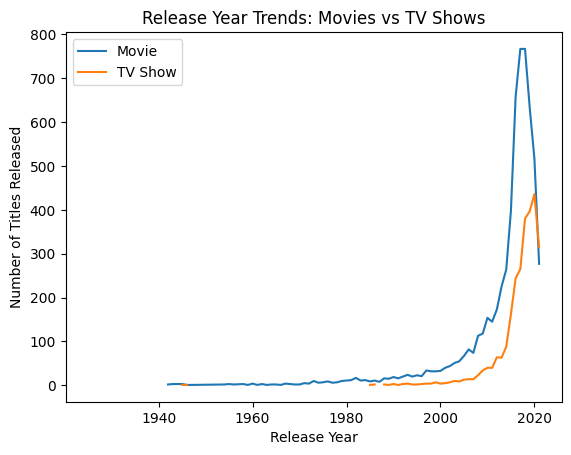

In [21]:
# Grouping the data by release year and type
grouped_data = df.groupby(['release_year', 'type']).size().unstack()

# Plotting the line chart
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='line')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles Released')
plt.title('Release Year Trends: Movies vs TV Shows')
plt.legend()

plt.show()

### Sunburst Chart - Distribution of Netflix Content by category and type

In [22]:
# Grouping the data by category and type and count the number of titles
category_type_counts = df.groupby(['listed_in', 'type']).size().reset_index(name='count')

# Creating a sunburst chart of the number of titles by category and type
fig = px.sunburst(category_type_counts,
                  path=['type', 'listed_in'],
                  values='count',
                  title='Distribution of Content by Category and Type')

fig.show()

### Choropleth Map - Netflix Content Distribution by Country

In [23]:
# Creating a new dataframe with only the relevant columns
country_df = df[['title', 'country']]
country_counts = country_df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Creating the Choropleth map
fig = px.choropleth(country_counts,
                    locations='country',
                    locationmode='country names',
                    color='count',
                    hover_name='country',
                    title='Distribution of Content by Country')

# Updating the layout
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

### Scatter Plot - Netflix Content Duration Over Time

/var/folders/yy/bv6k2_352p34_554p2_5s7h40000gn/T/ipykernel_52269/605230308.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



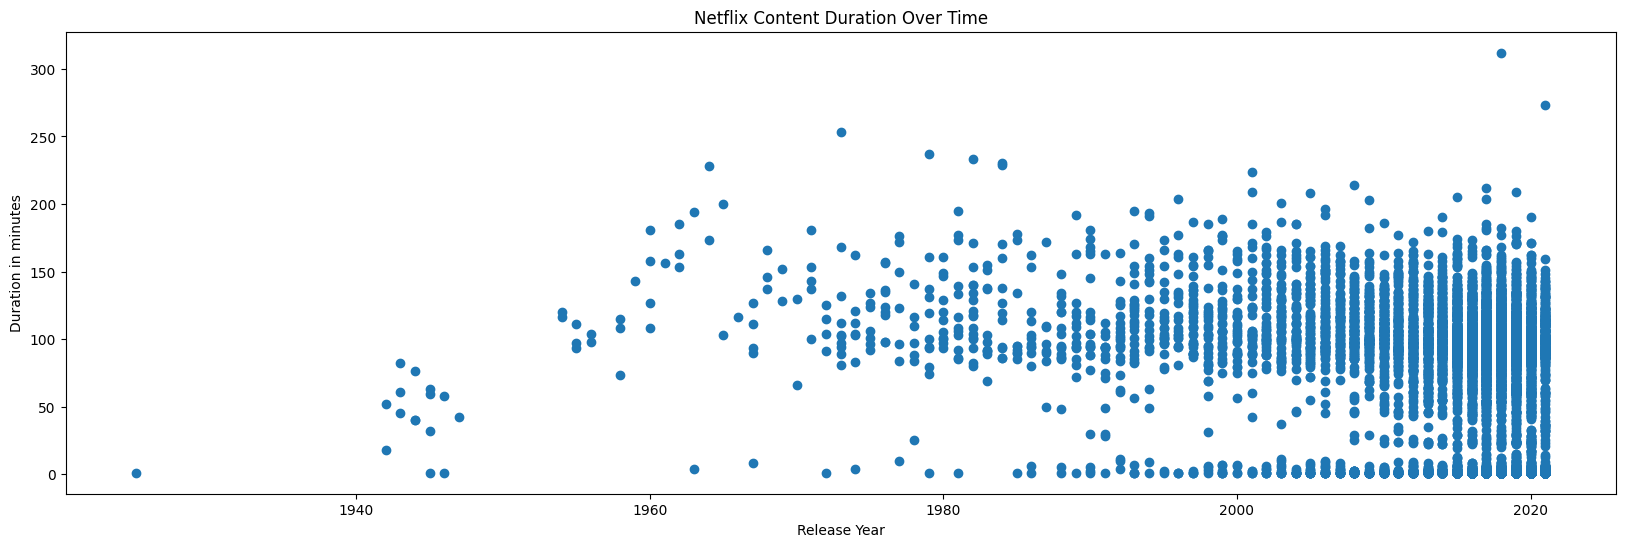

In [24]:
# Creating a new dataframe with only the relevant columns
duration_df = df[['title', 'duration', 'release_year']]

# Converting the duration column to numeric
duration_df['duration'] = pd.to_numeric(duration_df['duration'].str.split(' ').str.get(0))

# Creating the scatter plot
plt.figure(figsize=(20, 6))
plt.scatter(duration_df['release_year'], duration_df['duration'])
plt.xlabel('Release Year')
plt.ylabel('Duration in minutes')
plt.title('Netflix Content Duration Over Time')

plt.show()

### Treemap - Distribution of Netflix Content Categories

In [25]:
# Creating a new dataframe with only the relevant columns
category_df = df[['title', 'listed_in']]

# Grouping the data by category and count the number of titles
category_counts = category_df.groupby('listed_in').size().reset_index(name='Titles Count')

# Creating the treemap and adding custom_data for hover information
fig = px.treemap(category_counts,
                 path=['listed_in'],
                 values='Titles Count',
                 color='Titles Count',
                 color_continuous_scale='viridis',
                 title='Distribution of Content Categories',
                 custom_data=['listed_in', 'Titles Count']) 

# Customizing hover template to change the hover labels
fig.update_traces(hovertemplate="<b>%{customdata[0]}</b><br>Count: %{customdata[1]}<extra></extra>")

# Updating the layout
fig.update_layout(
    title_font=dict(size=16),
    margin=dict(t=50, r=10, l=10, b=10),
)

# Show the figure
fig.show()


### Pie Chart - Netflix Content Ratings

In [26]:
# Creating a pie chart of the rating distribution
labels = df['rating'].value_counts().index.to_list()
values = df['rating'].value_counts().values.tolist()

fig = px.pie(df, values=values, names=labels, title='Rating Distribution')

fig.show()

### Histogram - Movie Durations on Netflix

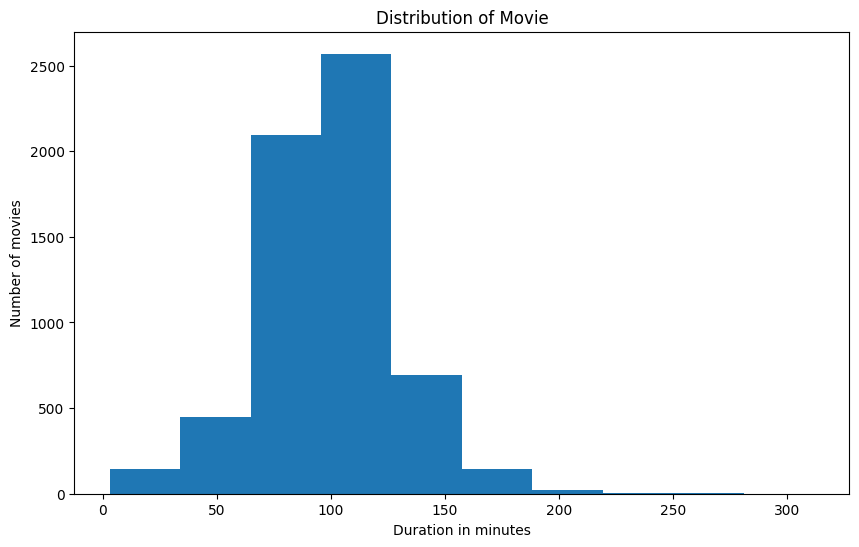

In [27]:
# Create a new dataframe with only the relevant columns
duration_df = df[df['type'] == 'Movie'][['title', 'duration']]

# Convert the duration column to numeric
duration_df['duration'] = pd.to_numeric(duration_df['duration'].str.split(' ').str.get(0))

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(duration_df['duration'], bins=10)
plt.xlabel('Duration in minutes')
plt.ylabel('Number of movies')
plt.title('Distribution of Movie')

plt.show()